## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

In [3]:
boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(0, 3]', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]',
       'TAX_(0, 250]', 'TAX_(250, 300]', 'TAX_(300, 360]', 'TAX_(360, 460]',
       'TAX_(460, 712]'],
      dtype='object')

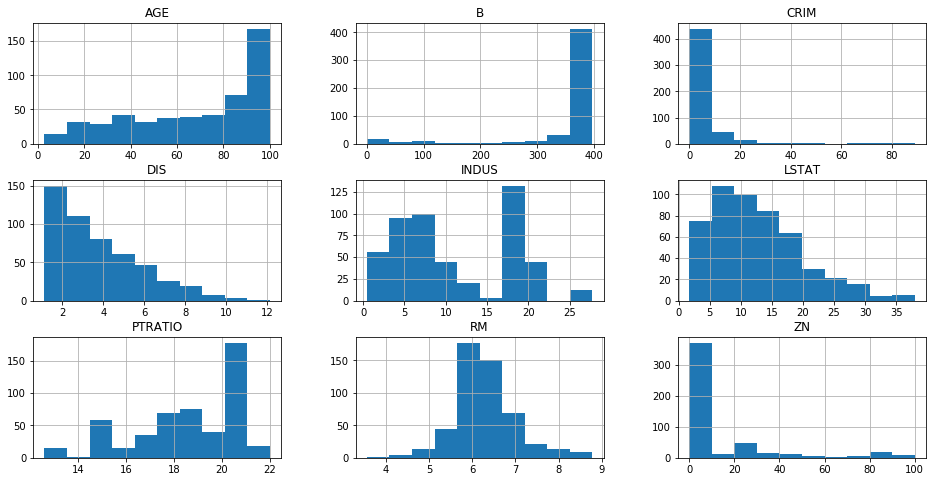

In [4]:
boston_cont = boston_features[["CRIM", "ZN", "INDUS", "RM", "AGE", "DIS", "PTRATIO", "B", "LSTAT"]]
boston_cont.hist(figsize  = [16, 8]);

No handles with labels found to put in legend.


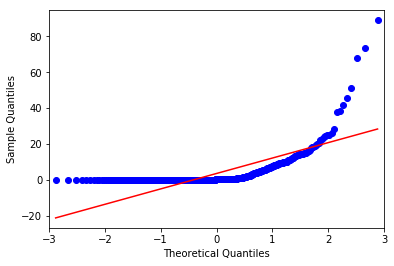

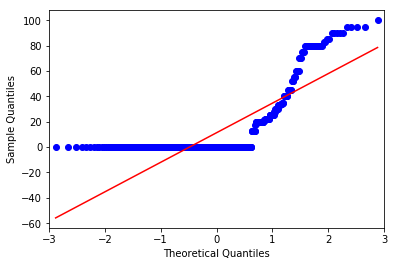

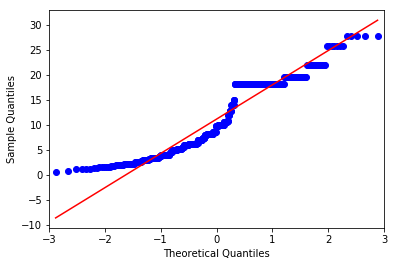

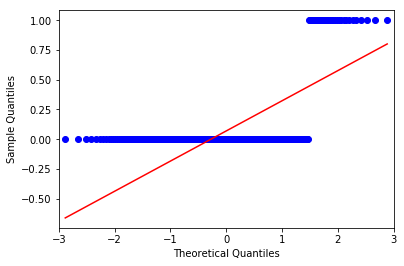

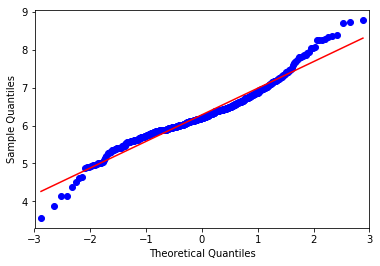

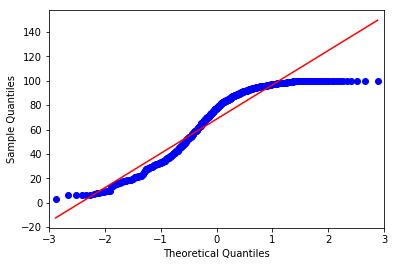

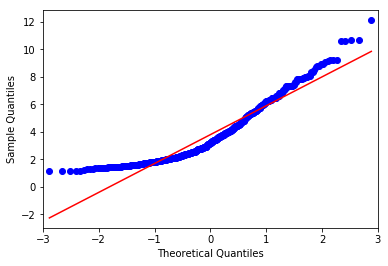

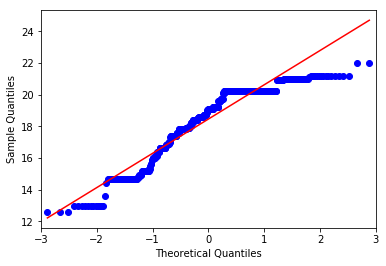

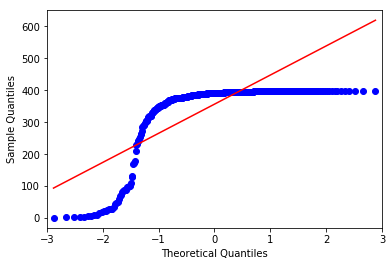

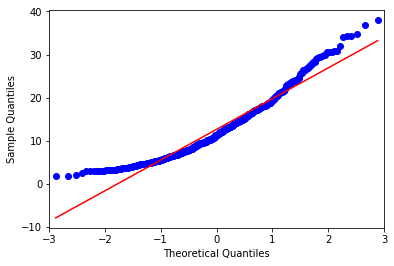

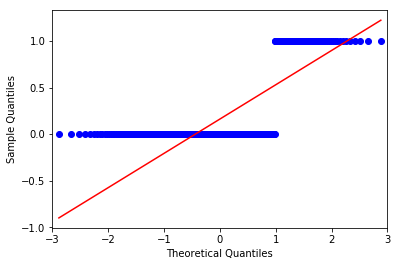

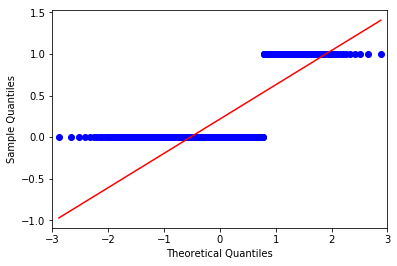

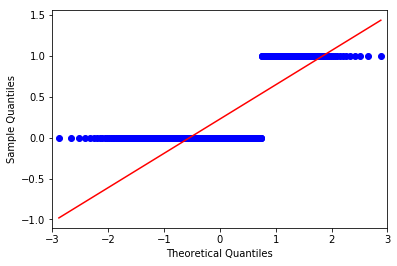

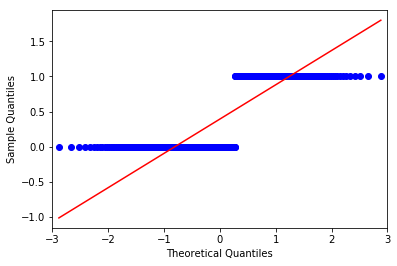

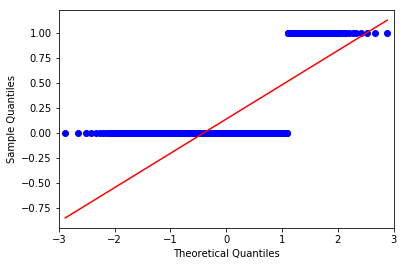

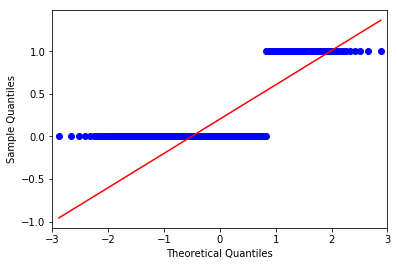

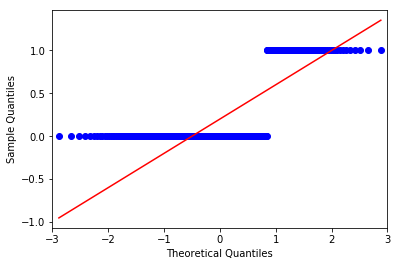

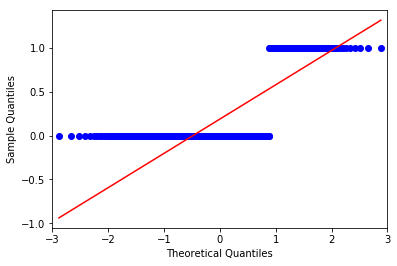

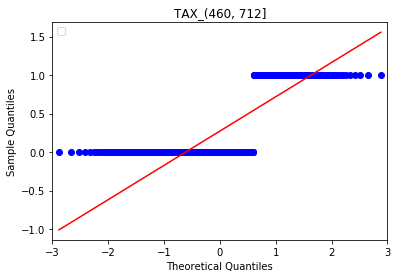

In [9]:
# from statsmodels.graphics.gofplots import qqplot
# import matplotlib.pyplot as plt
# for i in boston_features:
#     qqplot(boston_features[i], line='s')
# for column in boston_features:
#     plt.title(boston_features[column].name)
# plt.legend()
# plt.show()

## Perform log transformations for the variables where it makes sense

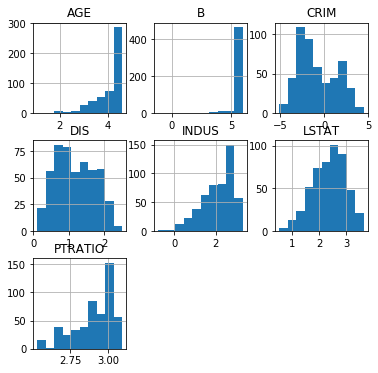

In [41]:
import numpy as np
data_log = pd.DataFrame([])
data_log["AGE"] = np.log(boston_cont["AGE"])
data_log["B"] = np.log(boston_cont["B"])
data_log["CRIM"] = np.log(boston_cont["CRIM"])
data_log["DIS"] = np.log(boston_cont["DIS"])
data_log["INDUS"] = np.log(boston_cont["INDUS"])
data_log["LSTAT"] = np.log(boston_cont["LSTAT"])
data_log["PTRATIO"] = np.log(boston_cont["PTRATIO"])
data_log.hist(figsize  = [6, 6]);

In [42]:
data_log["ZN"] = np.log(boston_cont["ZN"])
boston_cont["ZN"].describe()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

Some variables like CRIM, DIS and INDUS show less skweness and improved normality after the log transformatioin. ZN would probably be better as a category variable since it has so many zero values. 

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [43]:
data_log.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO,ZN
0,4.177459,5.983684,-5.064036,1.408545,0.837248,1.605430,2.727853,2.890372
1,4.368181,5.983684,-3.600502,1.602836,1.955860,2.212660,2.879198,-inf
2,4.112512,5.973377,-3.601235,1.602836,1.955860,1.393766,2.879198,-inf
3,3.824284,5.977949,-3.430523,1.802073,0.779325,1.078410,2.928524,-inf
4,3.992681,5.983684,-2.672924,1.802073,0.779325,1.673351,2.928524,-inf


In [44]:
data_minmax_scaled = pd.DataFrame([])
for col in data_log:
    data_minmax_scaled[col]= (data_log[col]-min(data_log[col]))/(max(data_log[col])-min(data_log[col]))
    
data_minmax_scaled.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO,ZN
0,0.879193,1.000000,0.000000,0.542096,0.393661,0.342318,0.348358,NaN
1,0.933063,1.000000,0.153211,0.623954,0.666533,0.538917,0.619906,NaN
2,0.860849,0.998553,0.153134,0.623954,0.666533,0.273789,0.619906,NaN
3,0.779439,0.999195,0.171005,0.707895,0.379532,0.171688,0.708405,NaN
4,0.827003,1.000000,0.250315,0.707895,0.379532,0.364308,0.708405,NaN


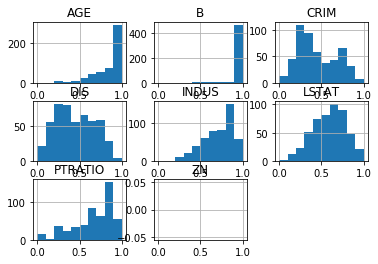

In [46]:
data_minmax_scaled.hist();

In [47]:
data_stand = pd.DataFrame([])
for col in data_minmax_scaled:
    data_stand[col] = (data_minmax_scaled[col]-np.mean(data_minmax_scaled[col]))/np.sqrt(np.var(data_minmax_scaled[col]))
    
    
data_stand.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO,ZN
0,0.142028,0.302592,-1.983228,0.409104,-1.704344,-1.275260,-1.443977,NaN
1,0.454617,0.302592,-1.305639,0.769562,-0.263239,-0.263711,-0.230278,NaN
2,0.035581,0.289253,-1.305978,0.769562,-0.263239,-1.627858,-0.230278,NaN
3,-0.436818,0.295169,-1.226942,1.139194,-1.778965,-2.153192,0.165279,NaN
4,-0.160820,0.302592,-0.876187,1.139194,-1.778965,-1.162114,0.165279,NaN


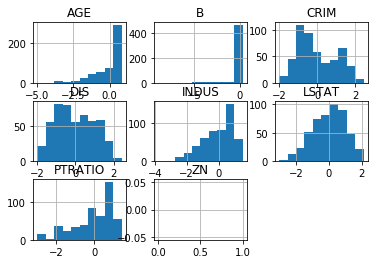

In [48]:
data_stand.hist();

In [50]:
data_mean_normalized = pd.DataFrame([])
for col in data_stand:
    data_mean_normalized[col] = (data_stand[col]-np.mean(data_stand[col]))/(max(data_stand[col])-min(data_stand[col]))
data_mean_normalized.head()

,AGE,B,CRIM,DIS,INDUS,LSTAT,PTRATIO,ZN
0,0.024476,0.032825,-0.448432,0.092905,-0.322716,-0.247852,-0.323068,NaN
1,0.078345,0.032825,-0.295221,0.174762,-0.049844,-0.051253,-0.051521,NaN
2,0.006132,0.031378,-0.295297,0.174762,-0.049844,-0.316381,-0.051521,NaN
3,-0.075278,0.032020,-0.277426,0.258703,-0.336846,-0.418482,0.036979,NaN
4,-0.027714,0.032825,-0.198116,0.258703,-0.336846,-0.225862,0.036979,NaN


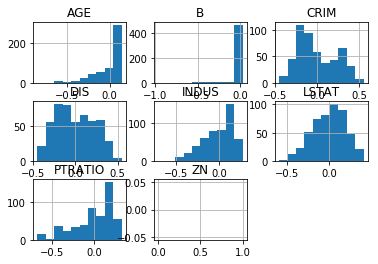

In [51]:
data_mean_normalized.hist();

In [53]:
features_final = data_mean_normalized.drop(["B", "ZN"], axis=1)
features_final.head()


,AGE,CRIM,DIS,INDUS,LSTAT,PTRATIO
0,0.024476,-0.448432,0.092905,-0.322716,-0.247852,-0.323068
1,0.078345,-0.295221,0.174762,-0.049844,-0.051253,-0.051521
2,0.006132,-0.295297,0.174762,-0.049844,-0.316381,-0.051521
3,-0.075278,-0.277426,0.258703,-0.336846,-0.418482,0.036979
4,-0.027714,-0.198116,0.258703,-0.336846,-0.225862,0.036979


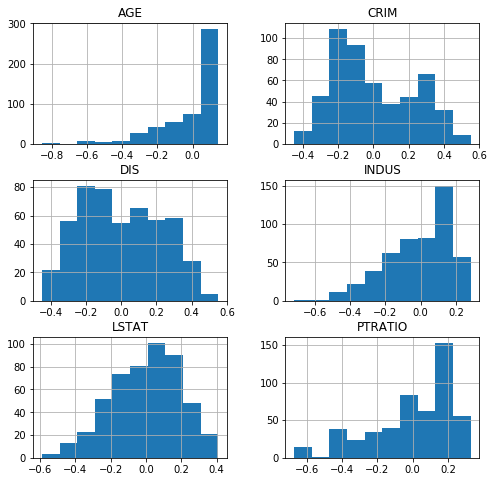

In [59]:
features_final.hist(figsize=(8,8));

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.